# Table of Contents
 <p><div class="lev1"><a href="#Autocorrelation-for-single-station"><span class="toc-item-num">1&nbsp;&nbsp;</span>Autocorrelation for single station</a></div><div class="lev2"><a href="#Data-import"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data import</a></div><div class="lev2"><a href="#Interpolate-onto-even-hourly-grid"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Interpolate onto even hourly grid</a></div><div class="lev2"><a href="#Plot-Auto-correlation-function"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot Auto-correlation function</a></div><div class="lev1"><a href="#Modelling-Variogram"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modelling Variogram</a></div>

In [26]:
options(jupyter.plot_mimetypes = 'image/png')

In [104]:
s_per_day = 3600 * 24

# Autocorrelation for single station

## Data import

In [6]:
station.data = read.csv("data2015/725450.14990.processed.2015.2015.csv", 
    header=FALSE,
    col.names=c("year", "month", "day", "hour", "min", "seconds","temp"))
head(station.data)

,year,month,day,hour,min,seconds,temp
1,2015,1,1,0,52,0,-7.8
2,2015,1,1,1,52,0,-8.3
3,2015,1,1,2,52,0,-8.3
4,2015,1,1,3,52,0,-9.4
5,2015,1,1,4,52,0,-9.4
6,2015,1,1,5,52,0,-10


In [7]:
station.date = with(station.data, paste(year, month, day, sep="-"))
station.time = with(station.data, paste(hour, min, seconds, sep=":"))
station.datetime = paste(station.date,station.time)
head(station.datetime)
station.Rdatetime = strptime(station.datetime, format="%Y-%m-%d %H:%M:%S", tz="UTC")

[1] "2015-1-1 0:52:0" "2015-1-1 1:52:0" "2015-1-1 2:52:0" "2015-1-1 3:52:0"
[5] "2015-1-1 4:52:0" "2015-1-1 5:52:0"

## Interpolate onto even hourly grid

In [8]:
station.zoo = zoo::zoo(x=station.data$temp, order.by=station.Rdatetime)
t.grid=seq(round(start(station.zoo)+1800, units="hour"), end(station.zoo), by="1 hour")
station.hourly = zoo::na.approx(station.zoo, xout=t.grid)

## Plot Auto-correlation function

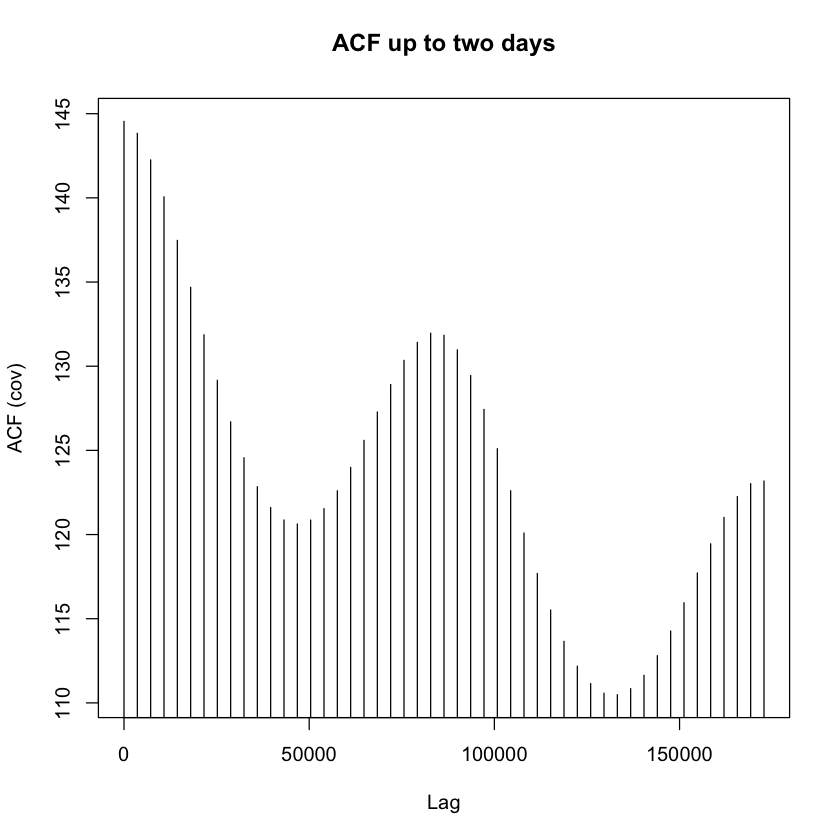

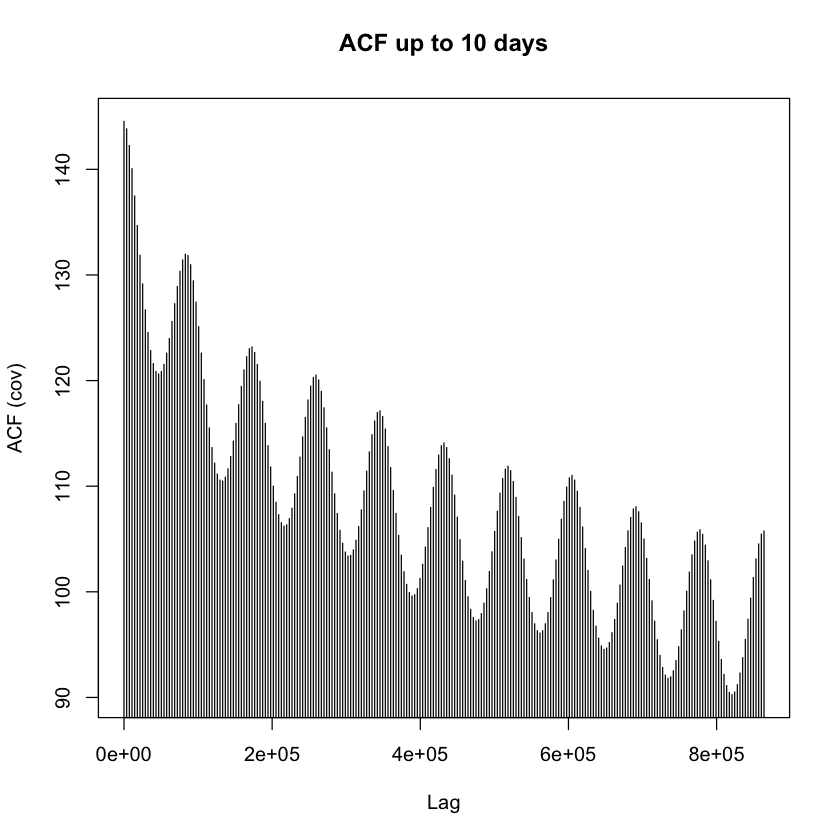

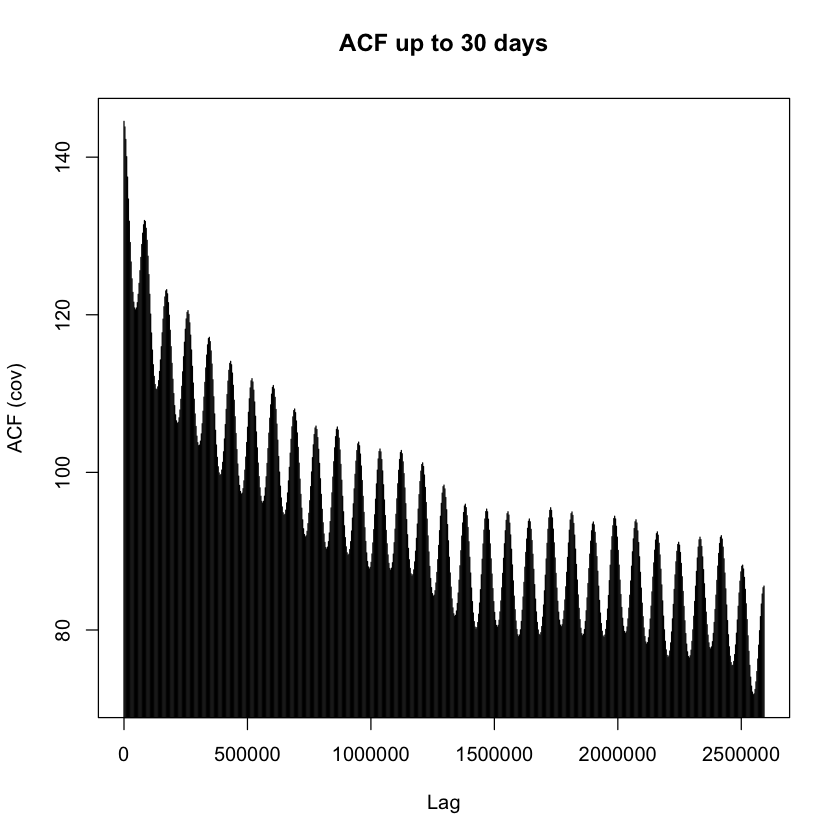

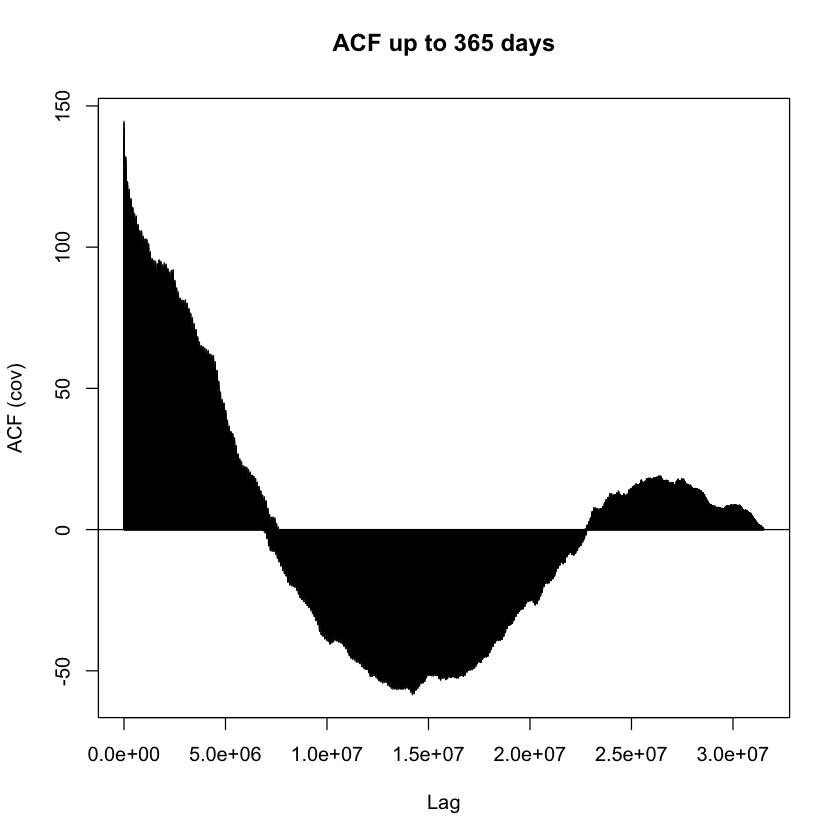

In [113]:
acf(station.hourly, type="covariance", lag.max=48, main="ACF up to two days")
acf(station.hourly, type="covariance",lag.max=24*10, main="ACF up to 10 days")
acf(station.hourly, type="covariance",lag.max=24*30, main="ACF up to 30 days")
acf(station.hourly, type="covariance",lag.max=24*365, main="ACF up to 365 days")

Annoyingly the x-axis is in seconds, but the picture is pretty clear. I see three components on top of each other:
* diurnal cycle
* seasonal cycle
* short-term decaying kernel

# Modelling Variogram

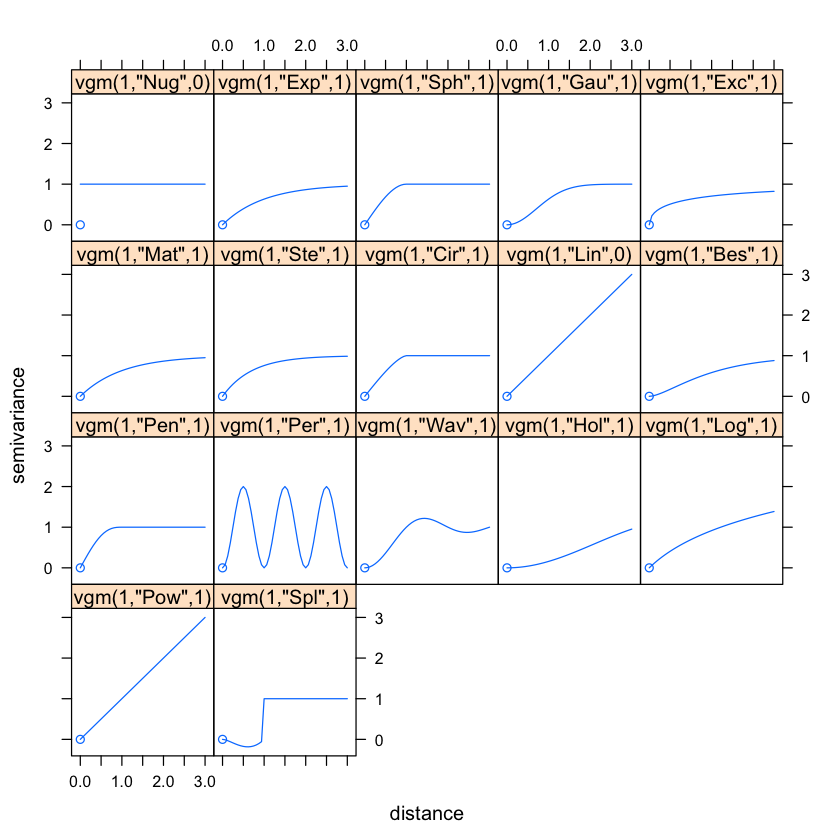

In [10]:
gstat::show.vgms()

In [13]:
data(s100, package="geoR")

In [23]:
length(s100$data)

[1] 100

In [15]:
head(s100)

0.807126710191369,0.945446013007313
0.549998071510345,0.68326491676271
0.340805544517934,0.458508880343288
0.137099310290068,0.472008324228227
0.0441856924444437,0.122320174705237
0.0278163598850369,0.803745875600725
0.724385298788548,0.623324948828667
0.24697387451306,0.142057696357369
0.522983879316598,0.762018443550915
0.249600428156555,0.584059758111835
0.0289917383342981,0.956061555538327


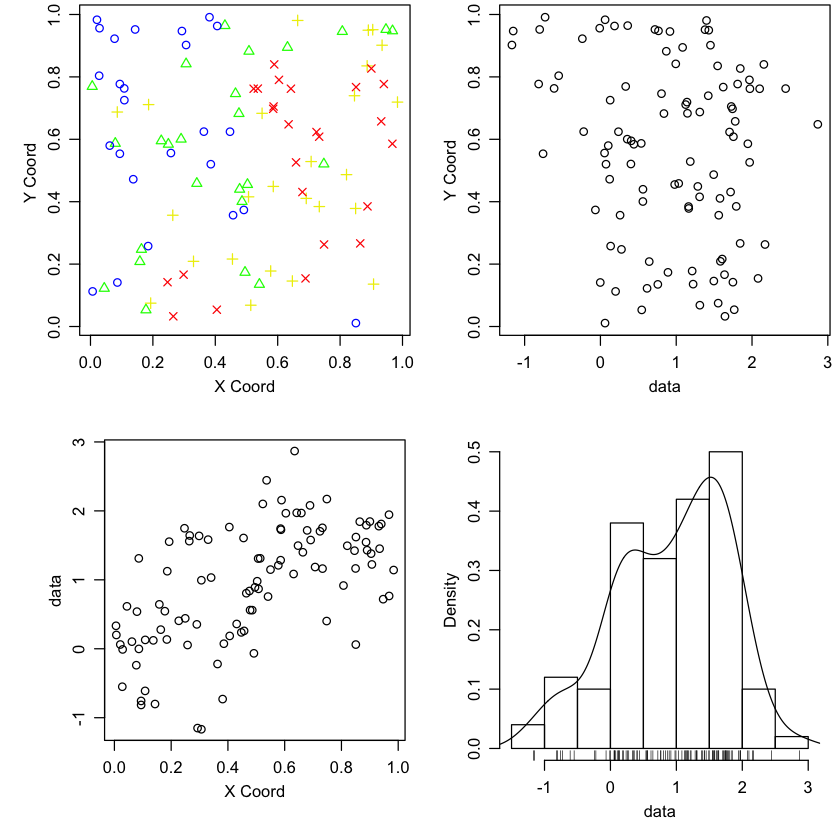

In [29]:
plot(s100)

In [21]:
cloud1 <- geoR::variog(s100, option = "cloud", max.dist=1)
cloud2 <- geoR::variog(s100, option = "cloud", estimator.type = "modulus", max.dist=1)
bin1 <- geoR::variog(s100, uvec=seq(0,1,l=11))
bin2  <- geoR::variog(s100, uvec=seq(0,1,l=11), estimator.type= "modulus")

variog: computing omnidirectional variogram
variog: computing omnidirectional variogram
variog: computing omnidirectional variogram
variog: computing omnidirectional variogram


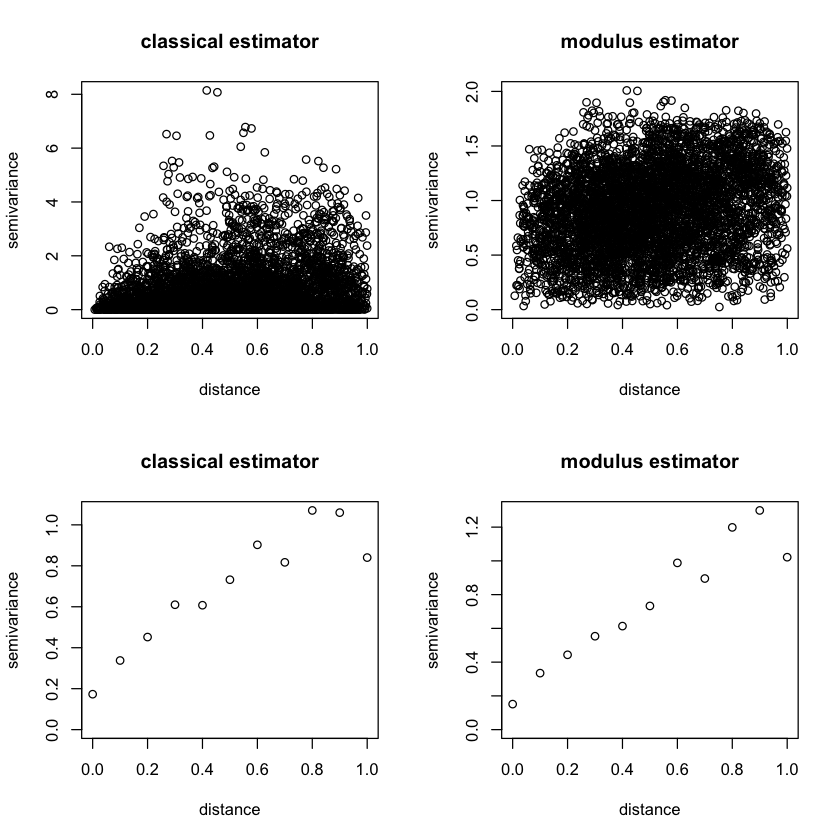

In [30]:
par(mfrow=c(2,2))
plot(cloud1, main = "classical estimator")
plot(cloud2, main = "modulus estimator")
plot(bin1, main = "classical estimator")
plot(bin2, main = "modulus estimator")

variog: computing omnidirectional variogram
variog: computing omnidirectional variogram


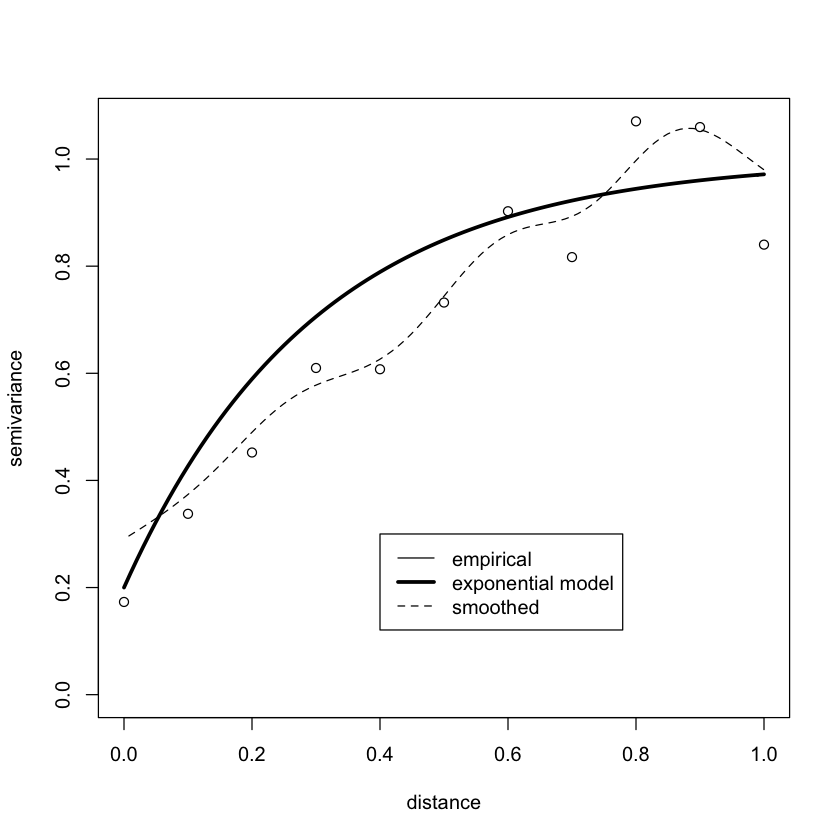

In [34]:
bin1 <- geoR::variog(s100, uvec = seq(0,1,l=11))
plot(bin1)
geoR::lines.variomodel(cov.model = "exp", cov.pars = c(0.8,0.3), nugget = 0.2, max.dist = 1,  lwd = 3)
smooth <- geoR::variog(s100, option = "smooth", max.dist = 1, n.points = 100, kernel = "normal", band = 0.2)
lines(smooth, type ="l", lty = 2)
legend(0.4, 0.3, c("empirical", "exponential model", "smoothed"), lty = c(1,1,2), lwd = c(1,3,1))

In [40]:
head(station.Rdatetime)

[1] "2015-01-01 00:52:00 UTC" "2015-01-01 01:52:00 UTC"
[3] "2015-01-01 02:52:00 UTC" "2015-01-01 03:52:00 UTC"
[5] "2015-01-01 04:52:00 UTC" "2015-01-01 05:52:00 UTC"

In [45]:
length(s100$data)

[1] 100

In [46]:
length(station.data$temp)

[1] 11569

In [47]:
dim(s100$coords)

[1] 100   2

In [82]:
time.matrix=matrix(as.numeric(zoo::index(na.omit(station.zoo))), ncol=1)
time.matrix=time.matrix-mean(time.matrix)
time.matrix = cbind(time.matrix, rep(1.0, nrow(time.matrix)))

In [83]:
mean(as.numeric(na.omit(station.zoo)))

[1] 9.747733

In [116]:
station.variog=geoR::variog(
    data=as.numeric(na.omit(station.zoo)), 
    coords=time.matrix, 
    option="bin",
    uvec = seq(0,3e7,by=3600))

variog: computing omnidirectional variogram


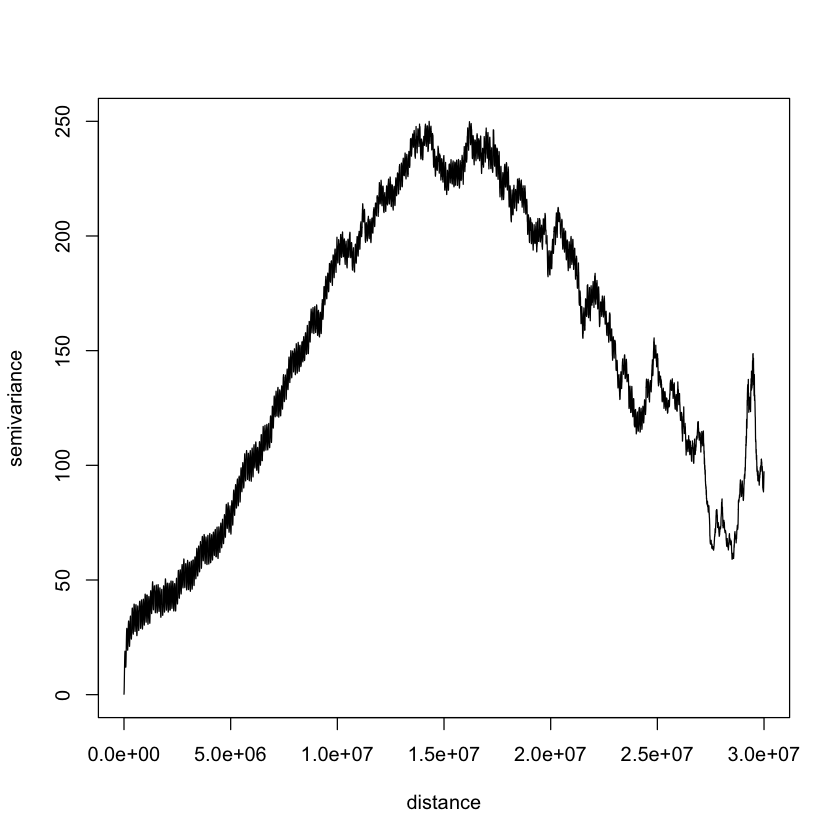

In [117]:
plot(station.variog, type="l")

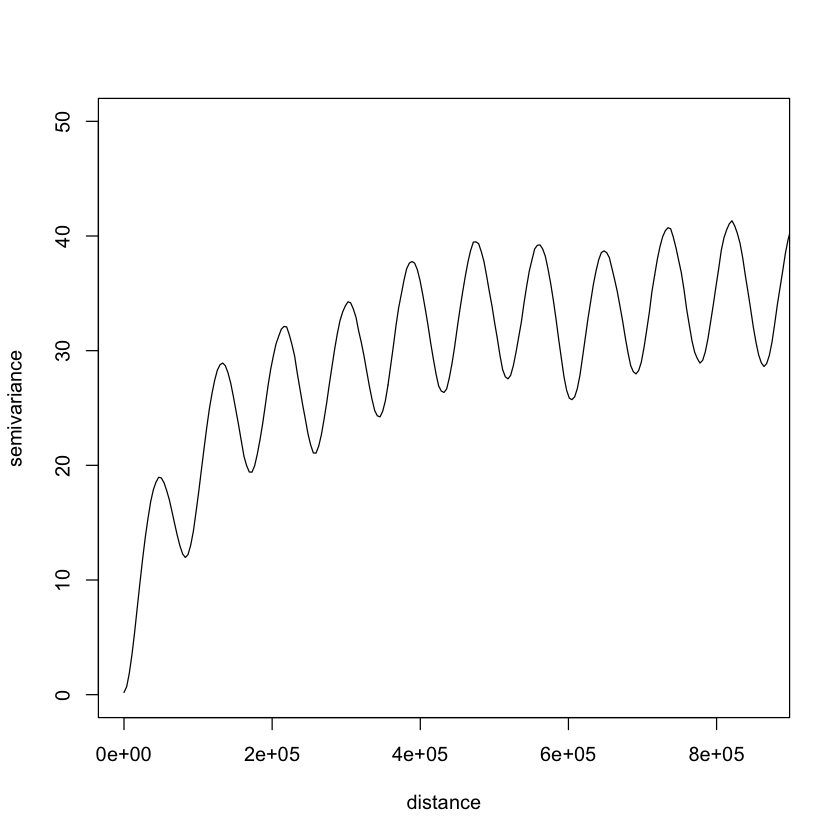

In [119]:
plot(station.variog, type="l", xlim=c(0,s_per_day*10), ylim=c(0,50))

In [120]:
geoR::variog

function (geodata, coords = geodata$coords, data = geodata$data, 
    uvec = "default", breaks = "default", trend = "cte", lambda = 1, 
    option = c("bin", "cloud", "smooth"), estimator.type = c("classical", 
        "modulus"), nugget.tolerance, max.dist, pairs.min = 2, 
    bin.cloud = FALSE, direction = "omnidirectional", tolerance = pi/8, 
    unit.angle = c("radians", "degrees"), angles = FALSE, messages, 
    ...) 
{
    if (missing(geodata)) 
        geodata <- list(coords = coords, data = data)
    call.fc <- match.call()
    if (missing(messages)) 
        messages.screen <- as.logical(ifelse(is.null(getOption("geoR.messages")), 
            TRUE, getOption("geoR.messages")))
    else messages.screen <- messages
    keep <- list(...)
    if (is.null(keep$keep.NA)) 
        keep.NA <- FALSE
    else keep.NA <- keep$keep.NA
    unit.angle <- match.arg(unit.angle)
    if (mode(direction) == "numeric") {
        if (length(direction) > 1) 
            stop("only one direction is allowed")
        if (length(tolerance) > 1) 
            stop("only one tolerance value is allowed")
        if (unit.angle == "degrees") {
            ang.deg <- direction
            ang.rad <- (ang.deg * pi)/180
            tol.deg <- tolerance
            tol.rad <- (tol.deg * pi)/180
        }
        else {
            ang.rad <- direction
            ang.deg <- (ang.rad * 180)/pi
            tol.rad <- tolerance
            tol.deg <- (tol.rad * 180)/pi
        }
        if (ang.rad > pi | ang.rad < 0) 
            stop("direction must be an angle in the interval [0,pi[ radians")
        if (tol.rad > pi/2 | tol.rad < 0) 
            stop("tolerance must be an angle in the interval [0,pi/2] radians")
        if (tol.deg >= 90) {
            direction <- "omnidirectional"
            cat("variog: computing omnidirectional variogram\n")
        }
        else {
            if (messages.screen) {
                cat(paste("variog: computing variogram for direction = ", 
                  round(ang.deg, digits = 3), " degrees (", round(ang.rad, 
                    digits = 3), " radians)\n", sep = ""))
                cat(paste("        tolerance angle = ", round(tol.deg, 
                  digits = 3), " degrees (", round(tol.rad, digits = 3), 
                  " radians)\n", sep = ""))
            }
        }
    }
    else if (messages.screen) 
        cat("variog: computing omnidirectional variogram\n")
    coords <- as.matrix(coords)
    data <- as.matrix(data)
    if (nrow(coords) != nrow(data)) 
        stop("coords and data have incompatible dimensions")
    data.var <- apply(data, 2, var)
    n.data <- nrow(coords)
    n.datasets <- ncol(data)
    data <- drop(data)
    option <- match.arg(option)
    estimator.type <- match.arg(estimator.type)
    if (abs(lambda - 1) > 1e-04) {
        if (abs(lambda) < 1e-04) 
            data <- log(data)
        else data <- ((data^lambda) - 1)/lambda
    }
    xmat <- unclass(trend.spatial(trend = trend, geodata = geodata))
    if (nrow(xmat) != n.data) 
        stop("coords and trend have incompatible sizes")
    if (trend != "cte") {
        if (is.vector(data)) {
            temp.fit <- lm(data ~ xmat + 0)
            beta.ols <- temp.fit$coeff
            data <- temp.fit$residuals
            temp.fit <- NULL
            names(data) <- NULL
        }
        else {
            only.res <- function(y, x) lm(y ~ xmat + 0)$residuals
            data <- apply(data, 2, only.res, x = xmat)
            only.beta <- function(y, x) lm(y ~ xmat + 0)$coef
            beta.ols <- apply(data, 2, only.beta, x = xmat)
        }
    }
    else beta.ols <- colMeans(as.matrix(data))
    u <- as.vector(dist(as.matrix(coords)))
    if (missing(nugget.tolerance) || nugget.tolerance < 1e-11) {
        nugget.tolerance <- 1e-12
        nt.ind <- FALSE
    }
    else {
        if (mode(nugget.tolerance) != "numeric") 
            stop("nugget.tolerance must be numeric")
        nt.ind <- TRUE
    }
    min.dist